In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,SpatialDropout1D
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd
import random
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing

Using TensorFlow backend.


In [7]:
input_dir = "E:\Introduction to Statistical Machine Learning\Kaggle/" #Directory where input files will be available
train_file = "Processed_Training_Data.csv"  #Input File
test_file = "Processed_Testing_Data.csv"
#input_path = input_dir+input_file  #Input File Path
import random
import numpy as np
import pandas as pd
random.seed(265)  #Setting random seed

In [8]:
numpy.random.seed(7)

In [9]:
train_data = pd.read_csv(input_dir+train_file)
test_data = pd.read_csv(input_dir+test_file)

In [10]:
train_data.head()

,Unnamed: 0,favorite_count,full_text,hashtags,retweet_count,year,party_id,Cleaned_Text,Cleaned_Text_WO_Stopwords,Cleaned_Tweets_Length,Cleaned_Tweets_WO_Stopwords_Length
0,0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,0,KUSINews One our longtime viewer wa Congressma...,kusinews one longtime viewer congressman darre...,110,88
1,1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,0,Today urging the CDCgov immediately launch pho...,today urging cdcgov immediately launch phone h...,238,207
2,2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,0,Tomorrow MO03 senior graduate from Calvary Lut...,tomorrow mo03 senior graduate calvary lutheran...,109,100
3,3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,0,Congrats TeamUSA and Canton Native JGreenway12...,congrats teamusa canton native jgreenway12 win...,93,85
4,4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,1,Pleased support amergateways their June Fiesta...,pleased support amergateways june fiesta honor...,244,223


In [6]:
train_data.isna().sum()

Unnamed: 0                       0
favorite_count                   0
full_text                        0
hashtags                         0
retweet_count                    0
year                         18712
party_id                         0
Cleaned_Text_WO_Stopwords        0
dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train_data['encoded_party']= label_encoder.fit_transform(train_data["party_id"])

In [8]:
X_train = train_data["Cleaned_Text_WO_Stopwords"]
y_train = train_data["encoded_party"]

In [9]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 40000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 500
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 267444 unique tokens.


In [10]:
X = tokenizer.texts_to_sequences(X_train.values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (592803, 70)


In [11]:
Y = y_train.values
print('Shape of label tensor:', Y.shape)
Y = Y.reshape(-1,1)

Shape of label tensor: (592803,)


In [12]:
print(Y.shape)

(592803, 1)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 64

history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 414962 samples, validate on 177841 samples
Epoch 1/2
145280/414962 [=========>....................] - ETA: 48:59 - loss: 0.3659 - accuracy: 0.8257

In [ ]:
test_data = pd.read_csv(input_dir+test_file)
test_data.head()

In [ ]:
X_test = test_data["Cleaned_Text_WO_Stopwords"]
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 40000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 500
#tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_test.values)
test_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(test_word_index))

In [ ]:
test_data_X = tokenizer.texts_to_sequences(X_test.values)
test_data_X = sequence.pad_sequences(test_data_X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', test_data_X.shape)

In [ ]:
test_ynew = model.predict_classes(test_data_X)

In [ ]:
test_ynew[0:10]

In [ ]:
prediction_labels = label_encoder.inverse_transform(list(test_ynew.tolist()))

In [ ]:
prediction_labels

In [ ]:
submissions_df = pd.DataFrame()
submissions_df["Id"] = test_data["Id"]
submissions_df["party"] = prediction_labels
submissions_df.to_csv("sample_submission_v1.csv",index=False)


In [ ]:
submissions_df

In [11]:
train_data

,Unnamed: 0,favorite_count,full_text,hashtags,retweet_count,year,party_id,Cleaned_Text,Cleaned_Text_WO_Stopwords,Cleaned_Tweets_Length,Cleaned_Tweets_WO_Stopwords_Length
0,0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,0,KUSINews One our longtime viewer wa Congressma...,kusinews one longtime viewer congressman darre...,110,88
1,1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,0,Today urging the CDCgov immediately launch pho...,today urging cdcgov immediately launch phone h...,238,207
2,2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,0,Tomorrow MO03 senior graduate from Calvary Lut...,tomorrow mo03 senior graduate calvary lutheran...,109,100
3,3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,0,Congrats TeamUSA and Canton Native JGreenway12...,congrats teamusa canton native jgreenway12 win...,93,85
4,4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,1,Pleased support amergateways their June Fiesta...,pleased support amergateways june fiesta honor...,244,223
...,...,...,...,...,...,...,...,...,...,...,...
592798,592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,0,This time focused career publicservice and pub...,time focused career publicservice publicsafety,55,46
592799,592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,0,StormyDaniels MichaelWolfe JamesComey Making t...,stormydaniels michaelwolfe jamescomey making f...,64,54
592800,592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,1,NRDems The American people deserve the truth a...,nrdems american people deserve truth congress ...,220,163
592801,592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,0,Only week left submit your app the Congression...,week left submit app congressional app challen...,96,82


In [19]:
train_data[(train_data['year']==2017.0) & (train_data['party_id']==0)].shape

(36637, 11)

In [21]:
republic_tweets_df = train_data[train_data["party_id"]==0 ]
democratic_tweets_df = train_data[train_data["party_id"]==1]
print("Republic Tweets Shape",republic_tweets_df.shape)
print("Democratic Tweets Shape",democratic_tweets_df.shape)

Republic Tweets Shape (268601, 11)
Democratic Tweets Shape (324202, 11)


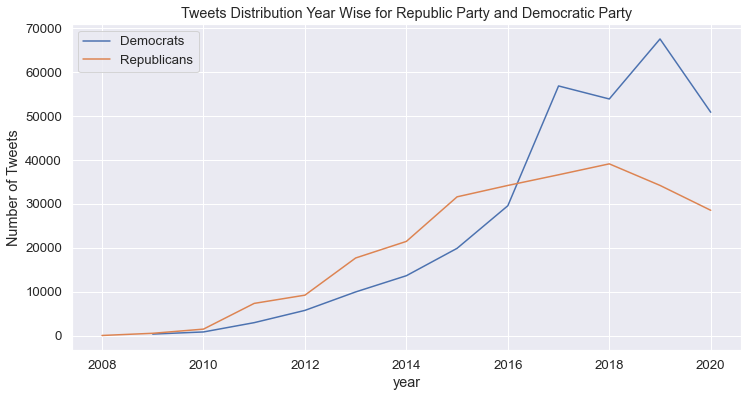

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
rep_year_tweets = republic_tweets_df.groupby('year').count()
rep_year_tweets.reset_index(inplace=True)
dem_year_tweets = democratic_tweets_df.groupby('year').count()
dem_year_tweets.reset_index(inplace=True)
sns.lineplot(x='year', y='retweet_count', data=dem_year_tweets);
sns.lineplot(x='year', y='retweet_count', data=rep_year_tweets);
plt.xlabel("year")
plt.ylabel("Number of Tweets")
plt.title("Tweets Distribution Year Wise for Republic Party and Democratic Party")
plt.legend(labels=["Democrats","Republicans"])

In [29]:
dem_year_tweets

,year,Unnamed: 0,favorite_count,full_text,hashtags,retweet_count,party_id,Cleaned_Text,Cleaned_Text_WO_Stopwords,Cleaned_Tweets_Length,Cleaned_Tweets_WO_Stopwords_Length
0,2009.0,333,333,333,333,333,333,333,333,333,333
1,2010.0,816,816,816,816,816,816,816,816,816,816
2,2011.0,2935,2935,2935,2935,2935,2935,2935,2935,2935,2935
3,2012.0,5731,5731,5731,5731,5731,5731,5731,5731,5731,5731
4,2013.0,9937,9937,9937,9937,9937,9937,9937,9937,9937,9937
5,2014.0,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634
6,2015.0,19877,19877,19877,19877,19877,19877,19877,19877,19877,19877
7,2016.0,29581,29581,29581,29581,29581,29581,29581,29581,29581,29581
8,2017.0,56882,56882,56882,56882,56882,56882,56880,56880,56882,56882
9,2018.0,53914,53914,53914,53914,53914,53914,53913,53913,53914,53914


In [30]:
rep_year_tweets

,year,Unnamed: 0,favorite_count,full_text,hashtags,retweet_count,party_id,Cleaned_Text,Cleaned_Text_WO_Stopwords,Cleaned_Tweets_Length,Cleaned_Tweets_WO_Stopwords_Length
0,2008.0,13,13,13,13,13,13,13,13,13,13
1,2009.0,511,511,511,511,511,511,511,511,511,511
2,2010.0,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461
3,2011.0,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325
4,2012.0,9201,9201,9201,9201,9201,9201,9201,9201,9201,9201
5,2013.0,17674,17674,17674,17674,17674,17674,17674,17674,17674,17674
6,2014.0,21454,21454,21454,21454,21454,21454,21454,21454,21454,21454
7,2015.0,31613,31613,31613,31613,31613,31613,31613,31613,31613,31613
8,2016.0,34205,34205,34205,34205,34205,34205,34203,34203,34205,34205
9,2017.0,36637,36637,36637,36637,36637,36637,36629,36629,36637,36637


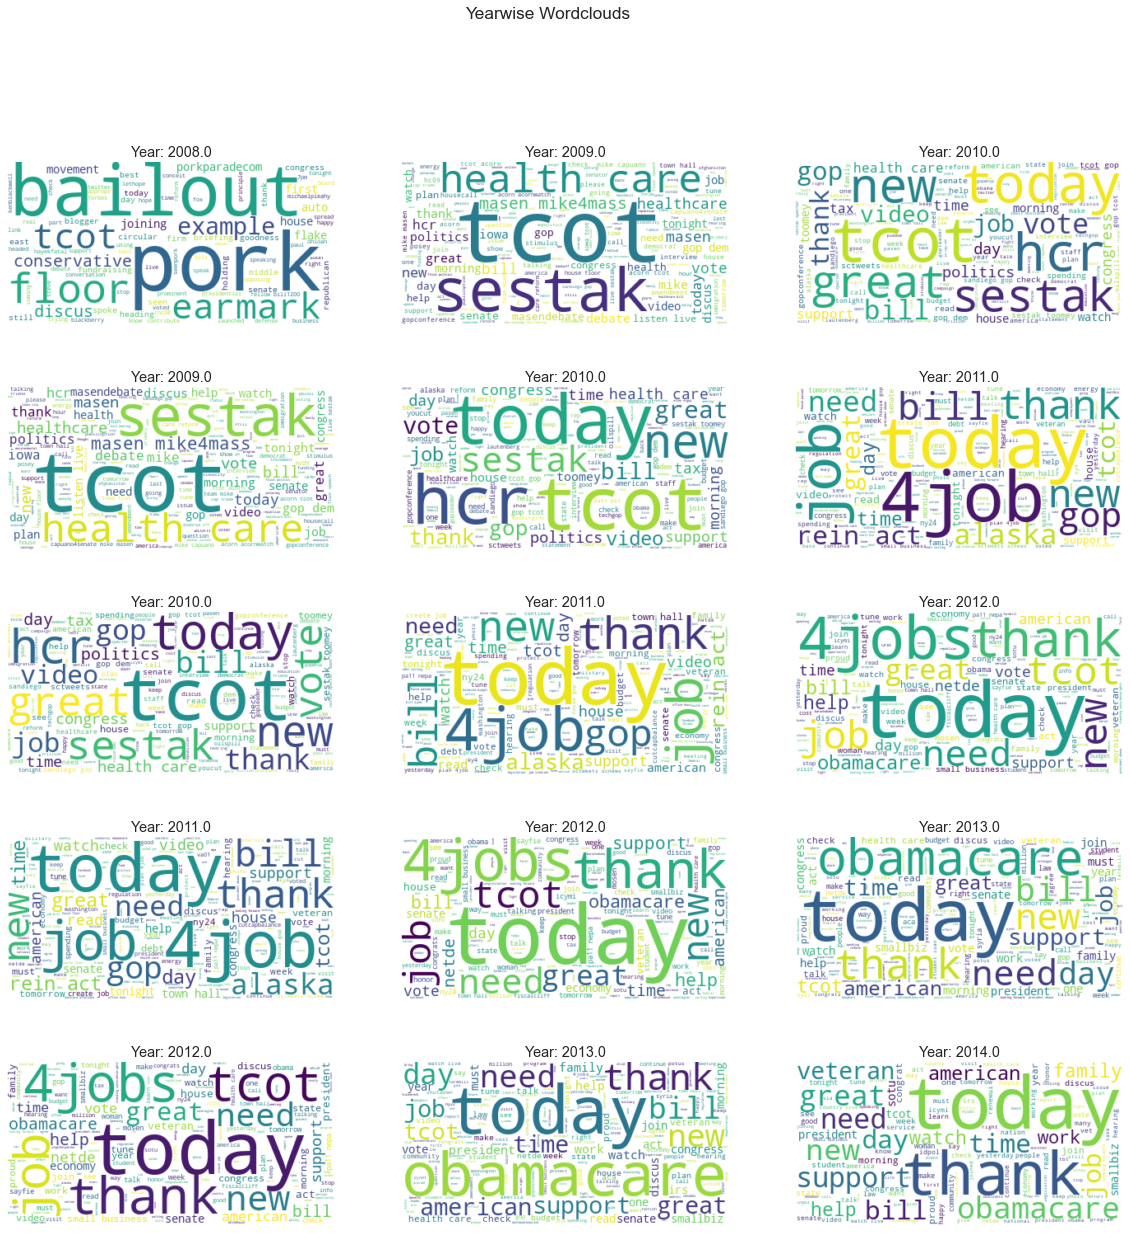

In [41]:
import math
from wordcloud import WordCloud
years = list(train_data["year"].dropna().unique())
years.sort()
frows = math.ceil(13/3)
fig, axs = plt.subplots(frows, 3,figsize=(20,20))
fig.suptitle("Yearwise Wordclouds")
for i in range(frows):
    for j in range(3):
        ctr_index = i+j
        year_val= years[ctr_index]
        year_tweets = train_data[train_data["year"]==year_val]
        tweets_text = " ".join(year_tweets["Cleaned_Text_WO_Stopwords"].values.tolist())  #Converting the column text t 
    
        tweet_wc = WordCloud(background_color="white").generate(tweets_text)  #Wordcloud Object
        title = "Year: "+str(year_val)
        axs[i,j].imshow(tweet_wc, interpolation='bilinear')  
        axs[i,j].axis("off")
        axs[i,j].set_title(title)
plt.show()

In [42]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


# Plotting tools
!pip install pyLDAvis
import pyLDAvis
#!pip install pyLDAvis.gensim
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [43]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


# Plotting tools
#!pip install pyLDAvis
import pyLDAvis
#!pip install pyLDAvis.gensim
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [45]:
data = train_data.Cleaned_Text_WO_Stopwords.values.tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Remove Stop Words
# data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


[['kusinews', 'one', 'longtime', 'viewer', 'congressman', 'today', 'sent', 'awesome', 'photo', 'kusi']]
['kusinews', 'one', 'longtime', 'viewer', 'congressman', 'today', 'sent', 'awesome', 'photo', 'kusi']


OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])

print(data_lemmatized[:1])


# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


[['longtime', 'viewer', 'congressman', 'today', 'awesome', 'photo', 'kusi']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [ ]:
# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis